In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


In [2]:
mnist.load_data

<function keras.src.datasets.mnist.load_data(path='mnist.npz')>

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show

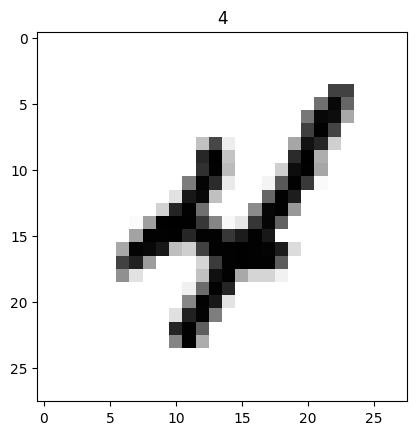

In [5]:
for i in range(10):
    plot_input_img(i)
 
 

In [6]:
# Preprocess the image
# Normalizing the image
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Reshape or expand the dimensions of images(28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)



In [66]:
X_train.shape

(60000, 28, 28, 1)

In [67]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [68]:
# Convert class to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [69]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [70]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation= 'softmax'))




c:\Users\VyomS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [73]:
'''model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])'''


"model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])"

In [74]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es = EarlyStopping(monitor = 'val_acc', min_delta = 0.01, patience = 4, verbose = 1)

# Model CheckPoint

mc = ModelCheckpoint("bestmodel.keras", monitor = "val_acc", verbose = 1,save_best_only = True)

cb = [es, mc]

In [75]:
'''from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)'''

'from tensorflow.keras.utils import to_categorical\n\n# Convert labels to one-hot encoding\ny_train = to_categorical(y_train, num_classes=10)\ny_test = to_categorical(y_test, num_classes=10)'

In [76]:
# Model Training
his = model.fit(X_train, y_train, epochs  = 50, validation_split = 0.3, batch_size = 32)

'''his = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])'''

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8562 - loss: 0.4666 - val_accuracy: 0.9726 - val_loss: 0.0876
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0839 - val_accuracy: 0.9819 - val_loss: 0.0578
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0552 - val_accuracy: 0.9838 - val_loss: 0.0543
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9854 - loss: 0.0454 - val_accuracy: 0.9860 - val_loss: 0.0476
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0410 - val_accuracy: 0.9867 - val_loss: 0.0450
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9888 - loss: 0.0335 - val_accuracy: 0.9894 - val_loss: 0.0390
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0289 - val_accuracy: 0.9873 - val_loss: 0.0441
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0253 - 

'his = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])'

In [77]:
model.save("bestmodel.keras")

In [78]:
model_S = keras.models.load_model("D:/8. Projects/Machine Learning/Digit Recognition/bestmodel.keras")

In [79]:
score = model_S.evaluate(X_test, y_test)

print(f"The model accuracy is {score[1]} ")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9901 - loss: 0.0538
The model accuracy is 0.9915000200271606 
